# SAKI HOMEWORK 1

Als erstes importieren wir die benötigten Pakete.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


Das Dataset wird geladen und und ein erster Überblick über die Daten verschafft:

In [30]:
df = pd.read_csv('dataset.csv', delimiter=';').iloc[:, 1:]
labels = df["label"].unique()
print(labels)
print(df.info())
print(df.head())

['income' 'living' 'private' 'standardOfLiving' 'leisure' 'finance']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auftragskonto                      168 non-null    float64
 1   Buchungstag                        209 non-null    object 
 2   Valutadatum                        209 non-null    object 
 3   Buchungstext                       209 non-null    object 
 4   Verwendungszweck                   209 non-null    object 
 5   Beguenstigter/Zahlungspflichtiger  209 non-null    object 
 6   Kontonummer                        208 non-null    object 
 7   BLZ                                208 non-null    object 
 8   Betrag                             209 non-null    object 
 9   Waehrung                           209 non-null    object 
 10  label                              209 non-null    ob

Die Labels werden in Zahlen umgewandelt:

In [31]:
le = preprocessing.LabelEncoder()
le.fit(df["label"])
le.transform(["income"])
print(le.inverse_transform([0, 1, 2, 3, 4, 5]))
df["label"] = le.transform(df["label"])
df.head()

['finance' 'income' 'leisure' 'living' 'private' 'standardOfLiving']


,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,Waehrung,label
0,89990201.0,28.07.2016,28.07.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,1
1,89990201.0,27.07.2016,27.07.2016,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,EUR,3
2,89990201.0,21.07.2016,21.07.2016,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,EUR,4
3,89990201.0,20.07.2016,20.07.2016,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,EUR,5
4,89990201.0,18.07.2016,18.07.2016,Spontanausgabe,Amazon,neue Playstation,9988776655,25125100,-363,EUR,2


Um aus den Daten bestmögliche Feature zu generieren schauene wir das Datenset Spalte für Spalte an. Begonnen wird mit der Spalte Auftragskonto. 
## Auftragskonto

In [32]:
unique_auftragskonto = df["Auftragskonto"].unique()
missing_auftragskonto = df["Auftragskonto"].isnull().sum()
print("unique: " + str(unique_auftragskonto))
print("missing: " + str(missing_auftragskonto))
df = df.drop("Auftragskonto", 1)

unique: [89990201. 89990210.       nan]
missing: 41


In dem Datensatz werden lediglich zwei verschiedene Auftragskonten aufgeführt und bei 41 Reihen fehlt diese sogar. Das Auftragskonto wird daher keinen Einfluss auf unser Modell haben und kann aus dem Datensatz erntfernt werden.

## Buchungstag/Valutadatum

In [33]:
buchungstag = df["Buchungstag"].to_numpy()
valutadatum = df["Valutadatum"].to_numpy()
print(len(np.where(buchungstag != valutadatum)[0]))

1


Buchungstag und Valutadatum unterscheiden sich nur in einer Zeile. Aus diesem Grund wird im weiteren nur noch der Buchungstag betrachtet. Besonders interessant für den Klassifizierer sind dabei die die Tage des Monats. Da am Ende des Monats meist das Gehalt oder die Miete abgebucht bzw. gutgeschrieben werden und andere Klassen sich eher über den gesamten Monat verteilen. Daher wandeln wir die genauen Angaben in den Tag des Monats um:

In [34]:
for index, day in enumerate(buchungstag):
    buchungstag[index] = day[0:2]
df = df.drop(columns=['Valutadatum'])
df["Buchungstag"] = buchungstag.astype(int)
for label in labels:
    asdf = df[["Buchungstag", "label"]].loc[df["label"] == label]
print(df["Buchungstag"])

0      28
1      27
2      21
3      20
4      18
       ..
204    15
205     2
206    28
207    28
208     8
Name: Buchungstag, Length: 209, dtype: int32


## Buchungstext

In [35]:
unique_buchungstext = df["Buchungstext"].unique()
print(unique_buchungstext)
le = preprocessing.LabelEncoder()
le.fit(df["Buchungstext"])
df["Buchungstext"] = le.transform(df["Buchungstext"]).astype(int)
df.head()

['Lohn / Gehalt' 'Miete' 'Bargeld' 'Lebensmittel / Getraenke'
 'Spontanausgabe' 'Mieteinnahmen' 'Drogerie' 'Geldanlage' 'Gehalt/Rente'
 'Lastschrift (Einzugsermächtigung)' 'Dauerauftrag' 'Abschluss'
 'Euro-Überweisung' 'Euroscheck / Gaa-Belastung Ausland']


,Buchungstag,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,Waehrung,label
0,28,10,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,1
1,27,11,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,EUR,3
2,21,1,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,EUR,4
3,20,9,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,EUR,5
4,18,13,Amazon,neue Playstation,9988776655,25125100,-363,EUR,2


Die Spalte Buchungstext beinhaltet 14 einzigartige Einträge, welche für eine spätere Klassifikation wichtig seien könnten. Die Einträge werden daher wie die labels codiert.

## Verwendungszweck

In [36]:
stopwords = pd.read_csv('stopwords.txt', header=None)[0].tolist()

df['Verwendungszweck'] = df['Verwendungszweck'].str.lower()
df['Verwendungszweck'] = df['Verwendungszweck'].str.replace('\d+', ' ', regex=True)
df['Verwendungszweck'] = df['Verwendungszweck'].str.replace('\W+'," ", regex=True)
df['Verwendungszweck'] = df["Verwendungszweck"].str.split().apply(lambda x: [item for item in x if item not in (stopwords) and len(item) > 3])
df['Verwendungszweck'] = df["Verwendungszweck"].apply(lambda x: ','.join(item for item in x))

print(df["Verwendungszweck"])


0      gehalt,adorsys,gmbh,notprovided,kundenreferenz...
1      byladem,miete,beuthener,notprovided,dauerauftr...
2                        nuernberg,einzahlung,auszahlung
3               edeka,neubauer,nuernb,nuernb,lastschrift
4                                                 amazon
                             ...                        
204    mietzuschuss,notprovided,kundenreferenz,nsct,g...
205    ccbade,sparen,notprovided,dauerauftrag,dauerau...
206    gehalt,adorsys,gmbh,notprovided,kundenreferenz...
207                     ssknde,einmalsparen,ueberweisung
208                                           abonnement
Name: Verwendungszweck, Length: 209, dtype: object


In [37]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(df['Verwendungszweck']).toarray()
feature_names = vectorizer.get_feature_names()
print(len(feature_names))
bowdf = pd.DataFrame(bow, columns=feature_names)
print(bowdf.head())
df = pd.concat([df.reset_index(drop=True),bowdf.reset_index(drop=True)], axis=1)
df = df.drop(columns=['Verwendungszweck'])
print(df.head())

109
   abonnement  abschlag  abschluss  adorsys  aenderungen  alld  amazon  \
0           0         0          0        1            0     0       0   
1           0         0          0        0            0     0       0   
2           0         0          0        0            0     0       0   
3           0         0          0        0            0     0       0   
4           0         0          0        0            0     0       1   

   ankenvers  apotheke  aramark  ...  verf  verfa  verfal  verfall  verfalld  \
0          0         0        0  ...     0      0       0        0         0   
1          0         0        0  ...     0      0       0        0         0   
2          0         0        0  ...     0      0       0        0         0   
3          0         0        0  ...     0      0       0        0         0   
4          0         0        0  ...     0      0       0        0         0   

   vero  visa  winkl  zalando  überweisung  
0     0     0      0     

## Beguenstigter

Hat starke Aussagekraft über die Klasse, kann aber zu Overfitting führen.

In [38]:
unique_beguenstigter = df["Beguenstigter/Zahlungspflichtiger"].unique()
print(len(unique_beguenstigter))
le = preprocessing.LabelEncoder()
le.fit(df["Beguenstigter/Zahlungspflichtiger"])
df["Beguenstigter/Zahlungspflichtiger"] = le.transform(df["Beguenstigter/Zahlungspflichtiger"]).astype(int)
df.head()

59


,Buchungstag,Buchungstext,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,Waehrung,label,abonnement,abschlag,...,verf,verfa,verfal,verfall,verfalld,vero,visa,winkl,zalando,überweisung
0,28,10,4,7807800780,25190001,2000.00,EUR,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27,11,30,DE31251900019123456780,VOHADE2HXXX,-670.00,EUR,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,1,15,9999900780,25190001,-70.00,EUR,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,9,39,9736000780,25190001,-73.21,EUR,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,13,58,9988776655,25125100,-363,EUR,2,0,0,...,0,0,0,0,0,0,0,0,0,0


## Kontonummer

Enthält dieselbe Information wie Beguenstigter.

In [39]:
df = df.drop(columns = ['Kontonummer'])

## BLZ

Ebenfalls nicht hilfreich für eine Klassifikation

In [40]:
df = df.drop(columns = ['BLZ'])

## Betrag

Da die Spalte Betrag unregelmäßigkeiten in der Benutzung von Punkt und Komma für die Trennung der Nachkommastellen aufweist, muss das angepasst werden.

In [41]:
df['Betrag'] = df['Betrag'].str.replace(',', '.', regex=True)
print(df['Betrag'].head())

0    2000.00
1    -670.00
2     -70.00
3     -73.21
4       -363
Name: Betrag, dtype: object


## Waehrung

Die Währung ist Euro und damit kein Mehrwert für die Klassifikation

In [42]:
df = df.drop(columns = ['Waehrung'])

## Generate Test and Trainingsset

[12  4 20  8  7 12]


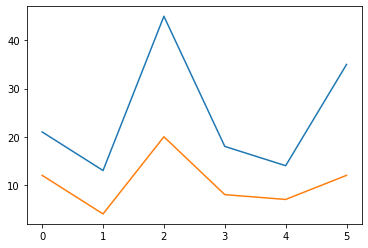

In [43]:
x_new = SelectKBest(mutual_info_classif, k=100).fit_transform(df.loc[:, df.columns != 'label'], df['label'])
value_train, value_test, label_train, label_test = train_test_split(x_new, df['label'], test_size=0.3, random_state=109)
table_training = np.bincount(label_train)
table_test = np.bincount(label_test)
print(table_test)
plt.plot(table_training)
plt.plot(table_test)

## Training

In [44]:
model = GaussianNB()
model.fit(value_train, label_train)

GaussianNB()

## Evalutation

In [45]:
prediction = model.predict(value_test)
classes = ['finance', 'income', 'leisure', 'living', 'private', 'standardOfLiving']
report = classification_report(label_test, prediction, target_names=classes)
print(report)

                  precision    recall  f1-score   support

         finance       0.92      0.92      0.92        12
          income       1.00      1.00      1.00         4
         leisure       1.00      0.95      0.97        20
          living       1.00      0.75      0.86         8
         private       0.55      0.86      0.67         7
standardOfLiving       1.00      0.92      0.96        12

        accuracy                           0.90        63
       macro avg       0.91      0.90      0.90        63
    weighted avg       0.93      0.90      0.91        63



In [46]:
from sklearn.model_selection import cross_val_score

#cv: int, cross-validation generator or an iterable, default=None
#Actually cv determines the cross-validation splitting strategy.
scores = cross_val_score(model, value_train, label_train, cv=5)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 5 folds
print(scores.mean())

[0.9        0.72413793 0.86206897 0.86206897 0.62068966]
0.7937931034482759


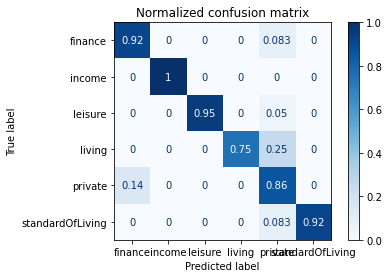

In [47]:
disp = plot_confusion_matrix(model, value_test, label_test,
                             display_labels=classes,
                             cmap=plt.cm.Blues,
                             normalize="true")
disp.ax_.set_title("Normalized confusion matrix")
plt.show()